Code adapted from https://www.youtube.com/watch?v=mUXkj1BKYk0&list=PLhA3b2k8R3t2Ng1WW_7MiXeh1pfQJQi_P&index=3

In [ ]:
!pip install python_speech_features
!pip install pyrubberband
!apt-get install -y rubberband-cli

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  rubberband-cli
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 82.5 kB of archives.
After this operation, 245 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 rubberband-cli amd64 1.8.2-1build1 [82.5 kB]
Fetched 82.5 kB in 0s (968 kB/s)
Selecting previously unselected package rubberband-cli.
(Reading database ... 128208 files and directories currently installed.)
Preparing to unpack .../rubberband-cli_1.8.2-1build1_amd64.deb ...
Unpacking rubberband-cli (1.8.2-1build1) ...
Setting up rubberband-cli (1.8.2-1build1) ...
Processing triggers for man-db (2.9.1-1) ...


In [ ]:
import os
from os import listdir
from os.path import isdir, join
import librosa
import random
import numpy as np
import matplotlib.pyplot as plt
import python_speech_features
import shutil
import random
from scipy.io import wavfile
import pandas as pd
from tqdm import tqdm
import wave
import soundfile as sf
import seaborn as sns
from IPython.display import Audio
import pyrubberband as pyrb
import soundfile as sf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading all files and output into 2 seperate data frames

In [ ]:
# Set paths to source directories
path1 = "/content/drive/MyDrive/21"
path2 = "/content/drive/MyDrive/output"
path3 = '/content/drive/MyDrive/additional_audio_targets/new_throngler_pyaudio'
path4 = '/content/drive/MyDrive/additional_audio_targets/new_throngler_sound_device'
path5 = '/content/drive/MyDrive/pitches_shifted'

In [ ]:
# Get file names from the specified paths
files_path1 = os.listdir(path1)
files_path2 = os.listdir(path2)
files_path3 = os.listdir(path3)
files_path4 = os.listdir(path4)
files_path5 = os.listdir(path5)

# Get file names with full paths from the specified paths
files_path1 = [os.path.join(path1, f) for f in os.listdir(path1)]
files_path2 = [os.path.join(path2, f) for f in os.listdir(path2)]
files_path3 = [os.path.join(path3, f) for f in os.listdir(path3)]
files_path4 = [os.path.join(path4, f) for f in os.listdir(path4)]
files_path5 = [os.path.join(path4, f) for f in os.listdir(path5)]
# Create dataframe with file names and labels
df_add5 = pd.DataFrame({'file_names': files_path1 + files_path3 + files_path4 + files_path2 + files_path5,
                   'label': [1] * len(files_path1 + files_path3 + files_path4+files_path5) + [0] * len(files_path2)})

In [ ]:
df_output = pd.DataFrame({'file_names' :files_path2})

In [ ]:
df_add5

,file_names,label
0,/content/drive/MyDrive/21/2023_02_21_16_38_35(...,1
1,/content/drive/MyDrive/21/2023_02_21_16_40_38(...,1
2,/content/drive/MyDrive/21/2023_02_21_16_38_35(...,1
3,/content/drive/MyDrive/21/2023_02_21_16_43_18(...,1
4,/content/drive/MyDrive/21/2023_02_21_16_43_36(...,1
...,...,...
3708,/content/drive/MyDrive/additional_audio_target...,0
3709,/content/drive/MyDrive/additional_audio_target...,0
3710,/content/drive/MyDrive/additional_audio_target...,0
3711,/content/drive/MyDrive/additional_audio_target...,0


In [ ]:
df_output

,file_names
0,/content/drive/MyDrive/output/common_voice_en_...
1,/content/drive/MyDrive/output/common_voice_en_...
2,/content/drive/MyDrive/output/common_voice_en_...
3,/content/drive/MyDrive/output/common_voice_en_...
4,/content/drive/MyDrive/output/common_voice_en_...
...,...
2868,/content/drive/MyDrive/output/common_voice_en_...
2869,/content/drive/MyDrive/output/common_voice_en_...
2870,/content/drive/MyDrive/output/common_voice_en_...
2871,/content/drive/MyDrive/output/common_voice_en_...


This function adds additional audio features add different pitches.

In [ ]:
def shift_pitch(audio_file, semitones, output_dir):
    # Load the input audio file
    y, sr = librosa.load(audio_file)

    # Calculate the pitch shift factor for the given number of semitones
    pitch_shift_factor = 2 ** (semitones / 12)

    # Apply pitch shift and time stretch using pyrubberband
    y_shifted_stretched = pyrb.time_stretch(pyrb.pitch_shift(y, sr, semitones), sr, 1.0 / pitch_shift_factor)

    # Construct the output file name and path
    file_name = os.path.basename(audio_file)
    output_file = os.path.join(output_dir, f"{file_name[:-4]}_shifted_{semitones}st.wav")

    # Save the shifted and stretched audio to a new file
    sf.write(output_file, y_shifted_stretched, sr)

Below I make copies of all targets with altered pitches

In [ ]:
input_dir = path1
output_dir = '/content/drive/MyDrive/pitches_shifted'
semitones = 2

for file in os.listdir(input_dir):
    if file.endswith('.wav'):
        input_file = os.path.join(input_dir, file)
        shift_pitch(input_file, semitones, output_dir)

In [ ]:
input_dir = path1
output_dir = '/content/drive/MyDrive/pitches_shifted'
semitones = -2

for file in os.listdir(input_dir):
    if file.endswith('.wav'):
        input_file = os.path.join(input_dir, file)
        shift_pitch(input_file, semitones, output_dir)

In [ ]:
input_dir = path3
output_dir = '/content/drive/MyDrive/pitches_shifted'
semitones = 2

for file in os.listdir(input_dir):
    if file.endswith('.wav'):
        input_file = os.path.join(input_dir, file)
        shift_pitch(input_file, semitones, output_dir)

In [ ]:
input_dir = path3
output_dir = '/content/drive/MyDrive/pitches_shifted'
semitones = -2

for file in os.listdir(input_dir):
    if file.endswith('.wav'):
        input_file = os.path.join(input_dir, file)
        shift_pitch(input_file, semitones, output_dir)

In [ ]:
input_dir = path4
output_dir = '/content/drive/MyDrive/pitches_shifted'
semitones = 2

for file in os.listdir(input_dir):
    if file.endswith('.wav'):
        input_file = os.path.join(input_dir, file)
        shift_pitch(input_file, semitones, output_dir)

In [ ]:
input_dir = path4
output_dir = '/content/drive/MyDrive/pitches_shifted'
semitones = -2

for file in os.listdir(input_dir):
    if file.endswith('.wav'):
        input_file = os.path.join(input_dir, file)
        shift_pitch(input_file, semitones, output_dir)

Create columns for sampel rate, signal, and time

In [ ]:
df['rate'] = 0.0
df['signal'] = None
df['length'] = 0.0

for i, row in df.iterrows():
    data, rate = sf.read(row['file_names'], dtype='float32')
    length = data.shape[0] / rate  # calculate the length in seconds
    df.at[i, 'rate'] = rate
    df.at[i, 'signal'] = data
    df.at[i, 'length'] = length

In [ ]:
df_output['rate'] = 0.0
df_output['signal'] = None
df_output['length'] = 0.0

for i, row in df_output.iterrows():
    data, rate = sf.read(row['file_names'], dtype='float32')
    length = data.shape[0] / rate  # calculate the length in seconds
    df_output.at[i, 'rate'] = rate
    df_output.at[i, 'signal'] = data
    df_output.at[i, 'length'] = length

In [ ]:
df.head()

,file_names,label,rate,signal,length
0,/content/drive/MyDrive/21/2023_02_21_16_38_35(...,1,44100.0,"[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...",1.933061
1,/content/drive/MyDrive/21/2023_02_21_16_40_38(...,1,44100.0,"[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...",2.094150
2,/content/drive/MyDrive/21/2023_02_21_16_38_35(...,1,44100.0,"[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...",1.933061
3,/content/drive/MyDrive/21/2023_02_21_16_43_18(...,1,44100.0,"[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...",2.174694
4,/content/drive/MyDrive/21/2023_02_21_16_43_36(...,1,44100.0,"[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...",2.174694


In [ ]:
rates = [df['rate'].unique()]
rates

[array([44100., 32000., 48000., 96000.,  8000., 11025., 24000.])]

In [ ]:

result = df[df['rate'] == 8000.0]
result

,file_names,label,rate,signal,length
409,/content/drive/MyDrive/output/99180-9-0-7.wav,0,8000.0,"[[0.15890503, 0.15890503], [0.034240723, 0.034...",4.0
525,/content/drive/MyDrive/output/99180-9-0-36.wav,0,8000.0,"[[-0.031463623, -0.031463623], [0.096588135, 0...",4.0
531,/content/drive/MyDrive/output/99180-9-0-0.wav,0,8000.0,"[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...",4.0
600,/content/drive/MyDrive/output/99180-9-0-2.wav,0,8000.0,"[[-0.09207153, -0.09207153], [-0.11740112, -0....",4.0
971,/content/drive/MyDrive/output/99180-9-0-48.wav,0,8000.0,"[[-0.021331787, -0.021331787], [-0.17941284, -...",4.0
1000,/content/drive/MyDrive/output/99180-9-0-49.wav,0,8000.0,"[[-0.102142334, -0.102142334], [0.2255249, 0.2...",4.0


Lowest Sample_Rate SR is 8000. It appears to be coming from the backround noise data

In [ ]:

result = df[df['rate'] == 96000.0]
result

,file_names,label,rate,signal,length
396,/content/drive/MyDrive/output/180937-7-3-17.wav,0,96000.0,"[[0.031502247, 0.031502247], [0.03768766, 0.03...",4.0
397,/content/drive/MyDrive/output/180937-7-2-7.wav,0,96000.0,"[[-0.058107376, -0.058107376], [-0.06292868, -...",4.0
404,/content/drive/MyDrive/output/113205-5-1-5.wav,0,96000.0,"[[0.017822385, 0.02603376], [0.017869592, 0.02...",4.0
407,/content/drive/MyDrive/output/180937-7-1-12.wav,0,96000.0,"[[-0.024888754, -0.024888754], [-0.030230999, ...",4.0
413,/content/drive/MyDrive/output/180937-7-0-5.wav,0,96000.0,"[[-0.049978733, -0.049978733], [-0.047548294, ...",4.0
...,...,...,...,...,...
1245,/content/drive/MyDrive/output/180937-7-4-12.wav,0,96000.0,"[[-0.057469368, -0.057469368], [-0.024150133, ...",4.0
1255,/content/drive/MyDrive/output/180937-7-4-13.wav,0,96000.0,"[[0.0019181967, 0.0019181967], [0.0059456825, ...",4.0
1262,/content/drive/MyDrive/output/113205-5-1-9.wav,0,96000.0,"[[0.058142304, 0.08493006], [0.05840242, 0.085...",4.0
1264,/content/drive/MyDrive/output/180937-7-3-27.wav,0,96000.0,"[[0.27997184, 0.27997184], [0.3309878, 0.33098...",4.0


In [ ]:

result = df[df['rate'] == 44100.0]
result

,file_names,label,rate,signal,length
0,/content/drive/MyDrive/21/2023_02_21_16_38_35(...,1,44100.0,"[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...",1.933061
1,/content/drive/MyDrive/21/2023_02_21_16_40_38(...,1,44100.0,"[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...",2.094150
2,/content/drive/MyDrive/21/2023_02_21_16_38_35(...,1,44100.0,"[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...",1.933061
3,/content/drive/MyDrive/21/2023_02_21_16_43_18(...,1,44100.0,"[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...",2.174694
4,/content/drive/MyDrive/21/2023_02_21_16_43_36(...,1,44100.0,"[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...",2.174694
...,...,...,...,...,...
1271,/content/drive/MyDrive/output/57320-0-0-15.wav,0,44100.0,"[[0.039367676, 0.07962036], [0.026550293, 0.07...",4.000000
1272,/content/drive/MyDrive/output/147764-4-4-2.wav,0,44100.0,"[[0.03692627, 0.010131836], [-0.037322998, 0.1...",4.000000
1273,/content/drive/MyDrive/output/55020-4-0-7.wav,0,44100.0,"[[-0.054473877, -0.014465332], [0.039520264, -...",4.000000
1274,/content/drive/MyDrive/output/69304-9-0-0.wav,0,44100.0,"[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...",4.000000


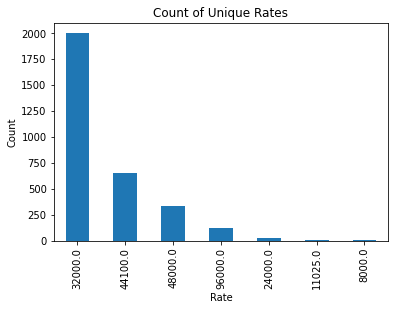

In [ ]:
df['rate'].value_counts().plot(kind='bar')

plt.xlabel('Rate')
plt.ylabel('Count')
plt.title('Count of Unique Rates')
plt.show()


most of my sample rates are above 9600. I'll model at 1600 which may be less detailed but could reduce noise and will make iterateing over different models quicker 

Make columns for average amplitude and max amplitude to see if any audio needs to be cut out. I pulled audio from verified lists but it looks like some of the audio was mislabled 

In [ ]:
df['avg_amplitude'] = df['signal'].apply(lambda x: np.mean(np.abs(x)))

In [ ]:
max_amplitudes = []
for signal in df['signal']:
    max_amplitude = np.max(np.abs(signal))
    max_amplitudes.append(max_amplitude)

df['max_amplitude'] = max_amplitudes

In [ ]:
max_amplitudes = []
for signal in df_output['signal']:
    max_amplitude = np.max(np.abs(signal))
    max_amplitudes.append(max_amplitude)

df_output['max_amplitude'] = max_amplitudes

In [ ]:
lowest_amp = df.sort_values(by='max_amplitude', ascending = True).head(100)
lowest_amp

,file_names,label,rate,signal,length,avg_amplitude,max_amplitude
2894,/content/drive/MyDrive/output/common_voice_en_...,0,32000.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4.968,0.000000,0.000000
1557,/content/drive/MyDrive/output/common_voice_en_...,0,32000.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",8.280,0.000000,0.000000
1680,/content/drive/MyDrive/output/common_voice_en_...,0,32000.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2.916,0.000019,0.000153
1755,/content/drive/MyDrive/output/common_voice_en_...,0,32000.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3.888,0.000019,0.000183
1895,/content/drive/MyDrive/output/common_voice_en_...,0,32000.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4.788,0.000024,0.000214
...,...,...,...,...,...,...,...
383,/content/drive/MyDrive/output/common_voice_en_...,0,32000.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3.528,0.000522,0.001892
2854,/content/drive/MyDrive/output/common_voice_en_...,0,32000.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3.276,0.000531,0.001923
3134,/content/drive/MyDrive/output/common_voice_en_...,0,32000.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.656,0.000052,0.001923
1368,/content/drive/MyDrive/output/common_voice_en_...,0,32000.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2.736,0.000451,0.001984


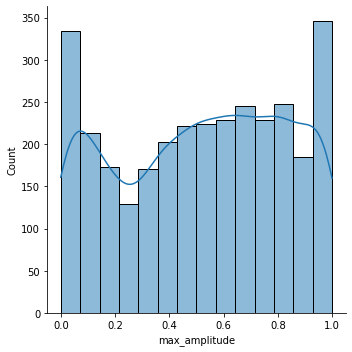

In [ ]:
# create the distribution plot
sns.displot(df['max_amplitude'], kde=True)

# show the plot
plt.show()

In [ ]:
filename = df.loc[2064, 'file_names']
print(filename)

/content/drive/MyDrive/output/common_voice_en_35365122.wav


In [ ]:
filename = df_output.loc[2578, 'file_names']
print(filename)

/content/drive/MyDrive/output/common_voice_en_36453637.wav


In [ ]:
from IPython.display import Audio

audio_file = "/content/drive/MyDrive/output/common_voice_en_36453637.wav"
Audio(audio_file)

I can hear a max amp of 0.002838


In [ ]:
df_output=df_output[df_output['max_amplitude']>=0.01]

In [ ]:
df_output.sort_values(by='max_amplitude', ascending = True).head(100)




,file_names,label,rate,signal,length,avg_amplitude,max_amplitude
1061,/content/drive/MyDrive/output/159738-8-0-8.wav,0,48000.0,"[[8.869171e-05, -0.00036644936], [-8.690357e-0...",4.000000,0.001870,0.010027
1065,/content/drive/MyDrive/output/159738-8-0-9.wav,0,48000.0,"[[-0.0037845373, -0.001467824], [-0.0035408735...",4.000000,0.001613,0.010027
1342,/content/drive/MyDrive/output/common_voice_en_...,0,32000.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3.996000,0.000904,0.011017
919,/content/drive/MyDrive/output/159738-8-0-11.wav,0,48000.0,"[[5.2809715e-05, 0.0008164644], [-0.0001251697...",4.000000,0.001682,0.011054
2578,/content/drive/MyDrive/output/common_voice_en_...,0,32000.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3.204000,0.000176,0.011993
...,...,...,...,...,...,...,...
2878,/content/drive/MyDrive/output/common_voice_en_...,0,32000.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4.356000,0.000033,0.044983
677,/content/drive/MyDrive/output/103258-5-0-11.wav,0,48000.0,"[[0.001373291, 0.009277344], [0.0016784668, 0....",4.000000,0.008385,0.045105
115,/content/drive/MyDrive/21/2023_02_21_17_10_16.wav,1,44100.0,"[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...",2.496871,0.000970,0.045502
92,/content/drive/MyDrive/21/2023_02_21_17_08_14.wav,1,44100.0,"[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...",2.738503,0.001133,0.045502


In [ ]:
new_output_list = [file for file in df_output['file_names']]

In [ ]:
len(new_output_list)

2734

In [ ]:
import json
with open('/content/drive/My Drive/new_output_list.json', 'w') as f:
    json.dump(new_output_list, f)

In [ ]:
df_add5

before adding pitch shift

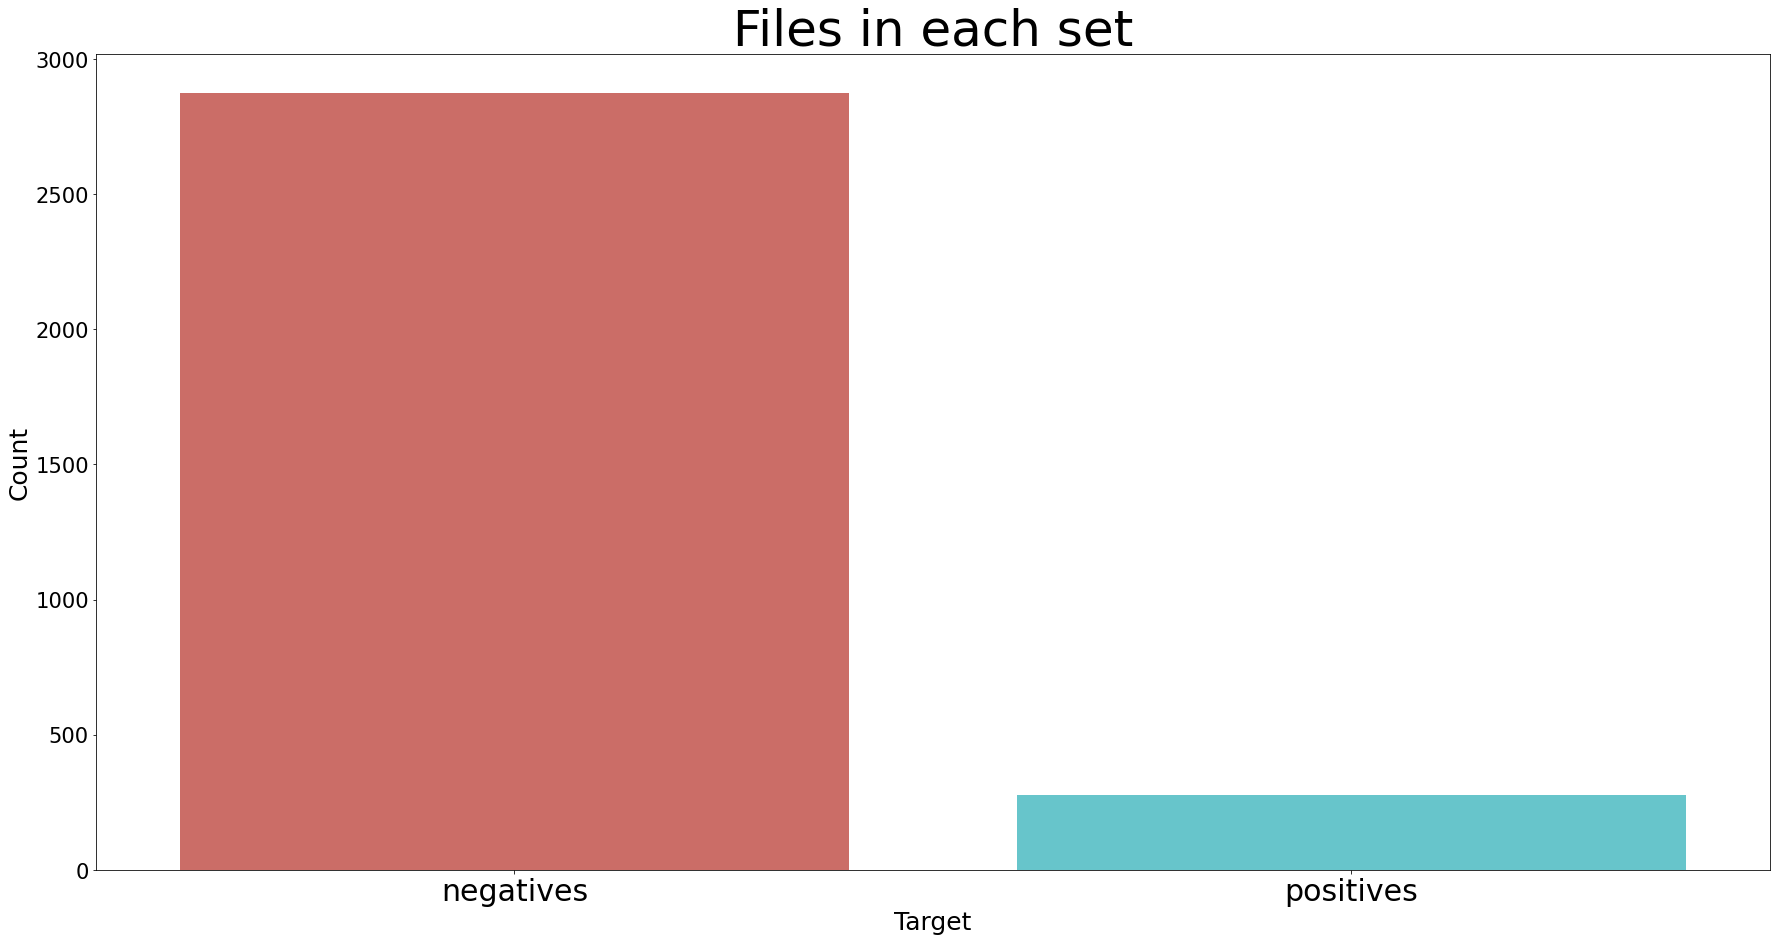

In [ ]:
new_names = ['negatives', 'positives']
plt.figure(figsize=(30, 15))
sns.countplot(x=df['label'],
              palette='hls',
              order=df['label'].value_counts().index)

plt.title("Files in each set", fontsize=50)
plt.xlabel("Target", fontsize=25)
plt.ylabel("Count", fontsize=25)
plt.yticks(fontsize=21)
plt.xticks(ticks=range(len(new_names)), labels=new_names, rotation=0, fontsize=30);

after pitch shift

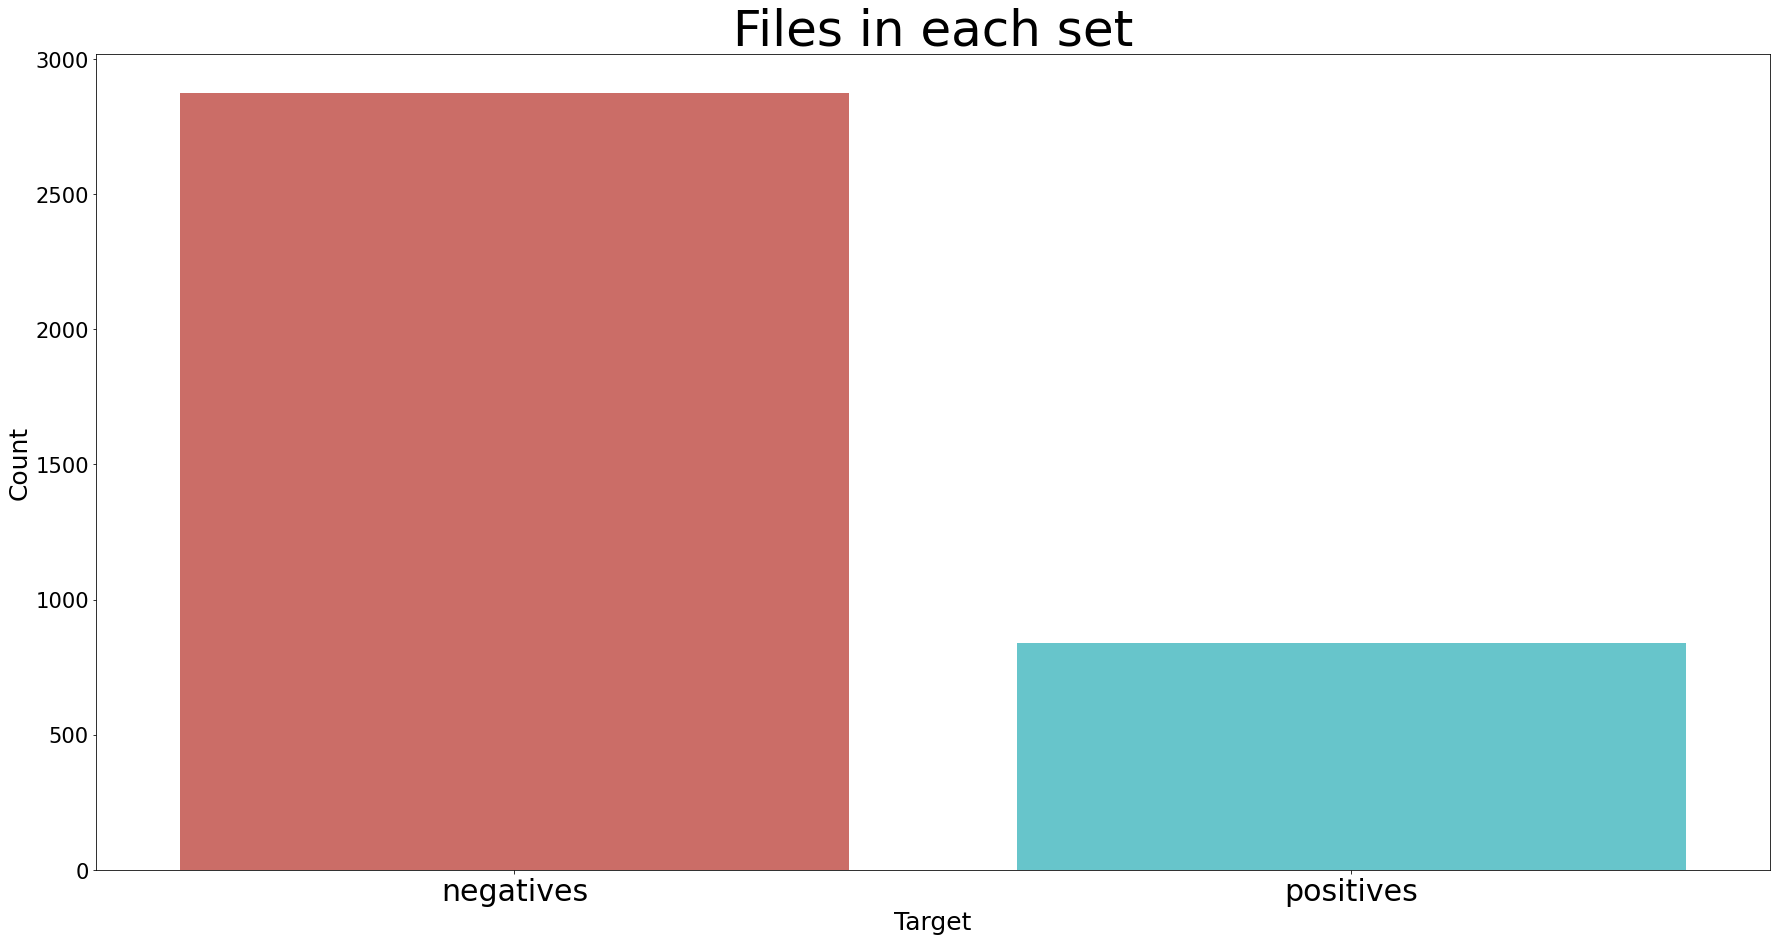

In [ ]:
new_names = ['negatives', 'positives']
plt.figure(figsize=(30, 15))
sns.countplot(x=df_add5['label'],
              palette='hls',
              order=df_add5['label'].value_counts().index)

plt.title("Files in each set", fontsize=50)
plt.xlabel("Target", fontsize=25)
plt.ylabel("Count", fontsize=25)
plt.yticks(fontsize=21)
plt.xticks(ticks=range(len(new_names)), labels=new_names, rotation=0, fontsize=30);

I'll probably need to add more data to make a more effective model

these 2 fucntions are from https://towardsdatascience.com/preprocess-audio-data-with-the-signal-envelope-499e6072108.

they are inteded to denoise my audio by slicing of chucks with low amplitude.

however the fucntion didin't end up workig with some of my quiter audio data.

This could be useful for future projects or a version of this one with more uniform amplitude.

I imagine it's compatible with all of the prefavricacted TFLOW sample audio data

In [ ]:
def envelope(signal, rate, threshold):
    """
    Inputs audio data in the form of a numpy array. Converts to pandas series
    to find the rolling average and apply the absolute value to the signal at all points.
    
    Additionally takes in the sample rate and threshold (amplitude). Data below the threshold
    will be filtered out. This is useful for filtering out environmental noise from recordings. 
    """
    mask = []
    signal = pd.Series(signal).apply(np.abs) # Convert to series to find rolling average and apply absolute value to the signal at all points. 
    signal_mean = signal.rolling(window = int(rate/10), min_periods = 1, center = True).mean() # Take the rolling average of the series within our specified window.
    
    for mean in signal_mean:
        if mean > threshold:
            mask.append(True)
        else:
            mask.append(False)
    return np.array(mask)

In [ ]:
def fft_calc(y, rate):
    """
    Performs fast fourier transform, converting time series data into frequency domain.
    """
    n = len(y)
    freq = np.fft.rfftfreq(n, d=(1/rate))
    Y = abs(np.fft.rfft(y)/n)
    return (Y, freq)

Visualizing envelope filters effect on sound data

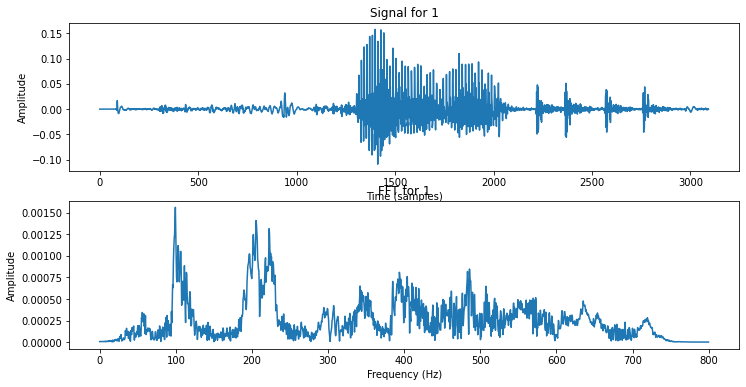

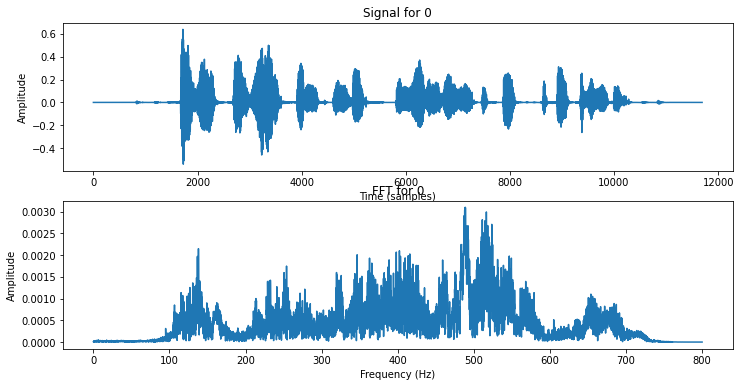

In [ ]:
# Loop over each class and plot the signal and FFT
for c in classes:
    # Select the first file for the current class and load the audio signal
    wav_file = pd.DataFrame(df[df.label == c]).iloc[0,0]
    signal, rate = librosa.load(wav_file, sr=1600)
    

    
    # Calculate the FFT of the signal
    Y, freq = fft_calc(signal, rate)
    
    # Store the signal and FFT in the dictionaries
    signals[c] = signal
    fft[c] = Y
    
    # Plot the signal and FFT for the current class
    fig, ax = plt.subplots(2, 1, figsize=(12, 6))
    ax[0].plot(signal)
    ax[0].set_xlabel('Time (samples)')
    ax[0].set_ylabel('Amplitude')
    ax[0].set_title('Signal for {}'.format(c))
    ax[1].plot(freq, Y)
    ax[1].set_xlabel('Frequency (Hz)')
    ax[1].set_ylabel('Amplitude')
    ax[1].set_title('FFT for {}'.format(c))
    plt.show()


The only clear differece is that low amplitudes of the tail of signal 0 get cut off which reduces a bit of potential noise

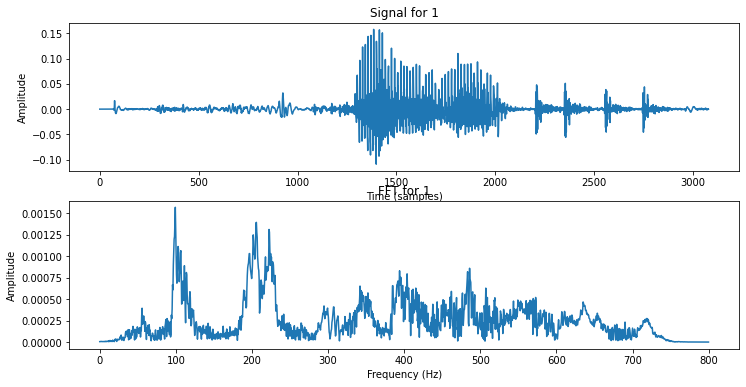

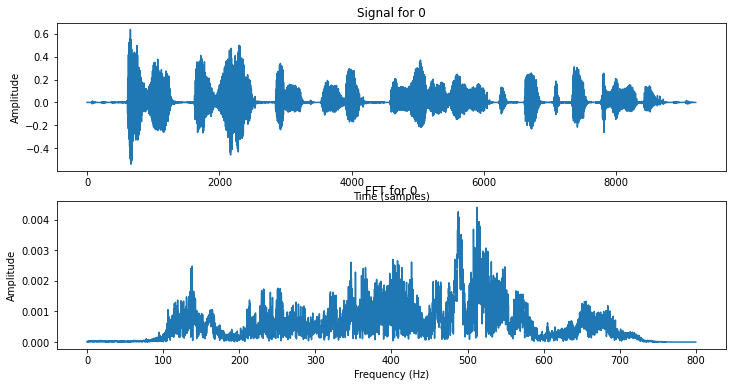

In [ ]:
classes = df.label.unique()
signals = {}
fft = {}



# Loop over each class and plot the signal and FFT
for c in classes:
    # Select the first file for the current class and load the audio signal
    wav_file = pd.DataFrame(df[df.label == c]).iloc[0,0]
    signal, rate = librosa.load(wav_file, sr=1600)
    
    # Apply the envelope function to filter out low amplitude noise
    mask = envelope(signal, rate, 0.0005)
    signal = signal[mask]
    
    # Calculate the FFT of the high-amplitude signal
    Y, freq = fft_calc(signal, rate)
    
    # Store the signal and FFT in the dictionaries
    signals[c] = signal
    fft[c] = Y
    
    # Plot the signal and FFT for the current class
    fig, ax = plt.subplots(2, 1, figsize=(12, 6))
    ax[0].plot(signal)
    ax[0].set_xlabel('Time (samples)')
    ax[0].set_ylabel('Amplitude')
    ax[0].set_title('Signal for {}'.format(c))
    ax[1].plot(freq, Y)
    ax[1].set_xlabel('Frequency (Hz)')
    ax[1].set_ylabel('Amplitude')
    ax[1].set_title('FFT for {}'.format(c))
    plt.show()

[Visualizing some more transformations as they progress towards mfccs

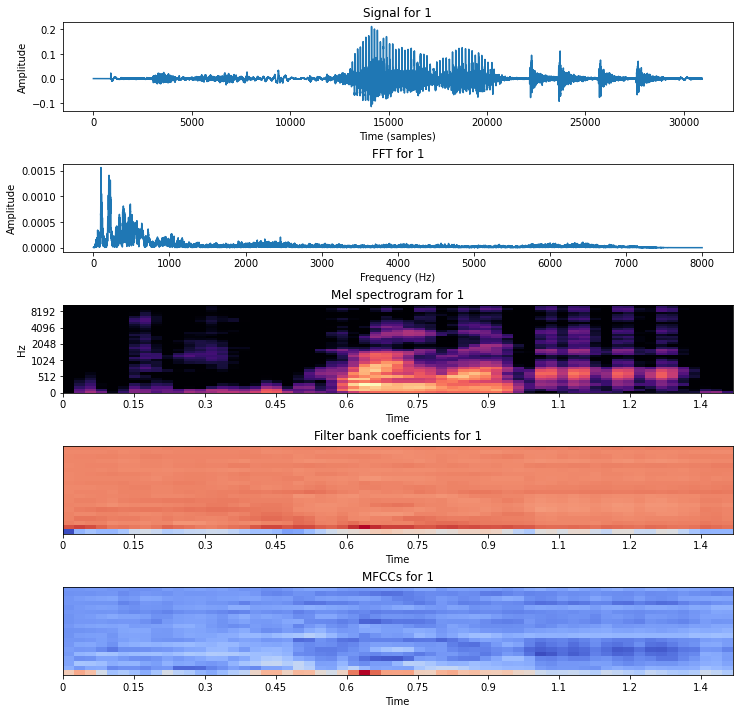

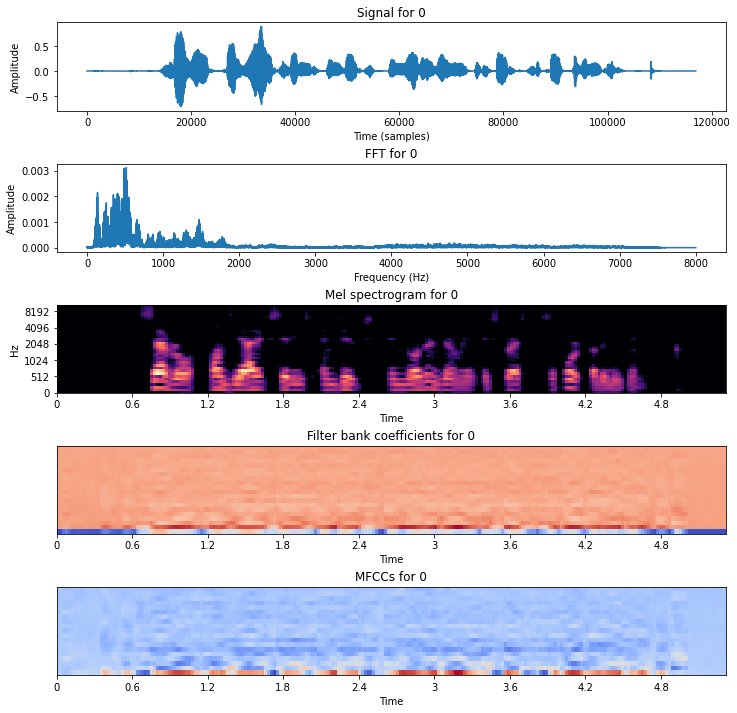

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Define the number of filters in the Mel filter bank and number of MFCCs
n_mels = 40
n_mfcc = 20

classes = df.label.unique()
signals = {}
fft = {}
fbank = {}
mfccs = {}

# Loop over each class and extract features
for c in classes:
    # Select the first file for the current class and load the audio signal
    wav_file = pd.DataFrame(df[df.label == c]).iloc[0,0]
    signal, rate = librosa.load(wav_file, sr=16000)
    
    # Apply the envelope function to filter out low amplitude noise
    mask = envelope(signal, rate, 0.005)
    signal = signal
    
    # Compute the short-time Fourier transform and power spectrum of the signal
    stft = np.abs(librosa.stft(signal))
    power = librosa.feature.melspectrogram(S=stft**2, n_mels=n_mels)
    
    # Compute the filter bank coefficients and MFCCs from the power spectrum
    fbank[c] = librosa.feature.mfcc(S=librosa.power_to_db(power), n_mfcc=n_mfcc)
    mfccs[c] = librosa.feature.mfcc(S=librosa.power_to_db(power), n_mfcc=n_mfcc)[1:]
    
    # Calculate the FFT of the high-amplitude signal
    Y, freq = fft_calc(signal, rate)
    
    # Store the signal, FFT, filter bank coefficients, and MFCCs in the dictionaries
    signals[c] = signal
    fft[c] = Y
    
    # Plot the signal, FFT, filter bank coefficients, and MFCCs for the current class
    fig, ax = plt.subplots(5, 1, figsize=(12, 12))
    ax[0].plot(signal)
    ax[0].set_xlabel('Time (samples)')
    ax[0].set_ylabel('Amplitude')
    ax[0].set_title('Signal for {}'.format(c))

    ax[1].plot(freq, Y)
    ax[1].set_xlabel('Frequency (Hz)')
    ax[1].set_ylabel('Amplitude')
    ax[1].set_title('FFT for {}'.format(c))
    
    librosa.display.specshow(librosa.amplitude_to_db(power, ref=np.max), y_axis='mel', x_axis='time', ax=ax[2])
    ax[2].set_title('Mel spectrogram for {}'.format(c))
    
    librosa.display.specshow(fbank[c], x_axis='time', ax=ax[3])
    ax[3].set_title('Filter bank coefficients for {}'.format(c))
    
    librosa.display.specshow(mfccs[c], x_axis='time', ax=ax[4])
    ax[4].set_title('MFCCs for {}'.format(c))
    
    plt.subplots_adjust(hspace=0.6)  # Increase the vertical space between subplots
    
    plt.show()


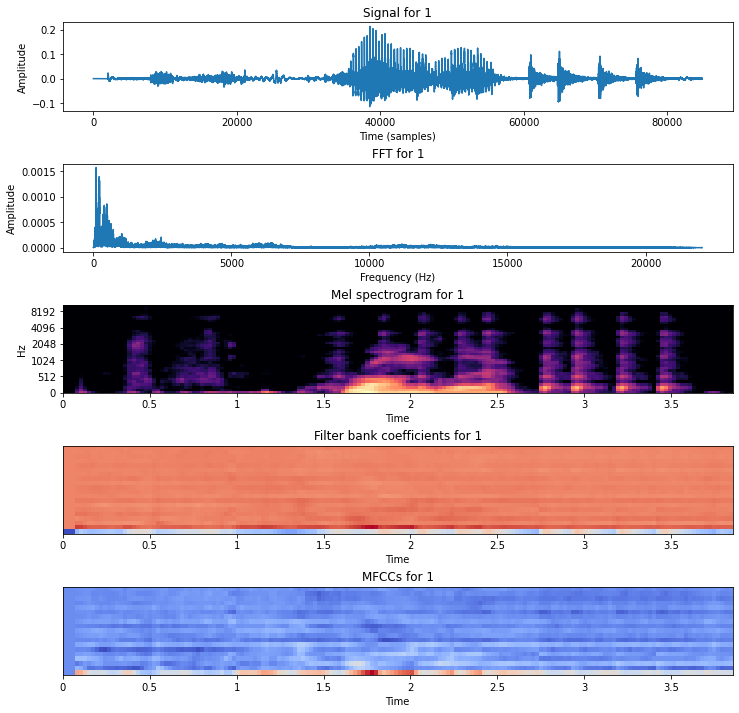

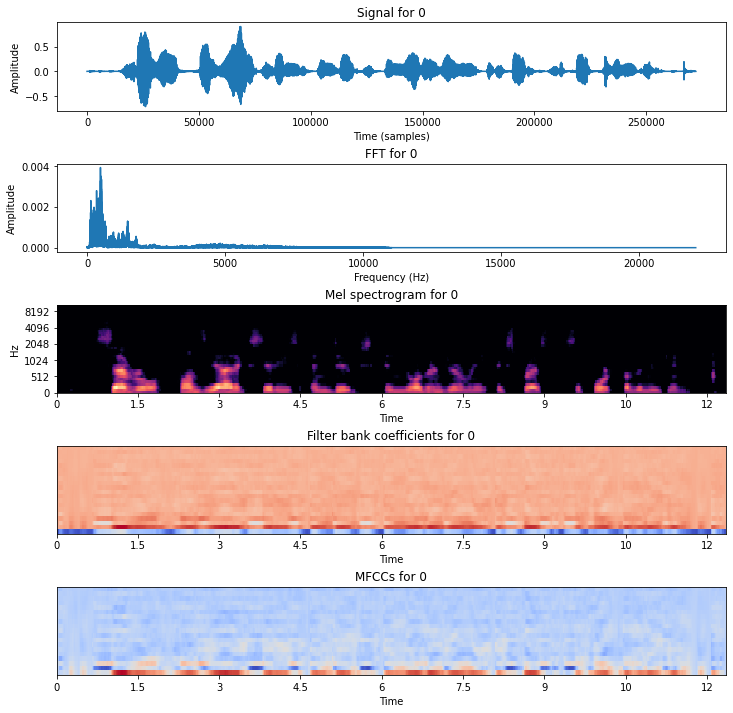

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Define the number of filters in the Mel filter bank and number of MFCCs
n_mels = 40
n_mfcc = 20

classes = df.label.unique()
signals = {}
fft = {}
fbank = {}
mfccs = {}

# Loop over each class and extract features
for c in classes:
    # Select the first file for the current class and load the audio signal
    wav_file = pd.DataFrame(df[df.label == c]).iloc[0,0]
    signal, rate = librosa.load(wav_file, sr=44100)
    
    # Apply the envelope function to filter out low amplitude noise
    mask = envelope(signal, rate, 0.0005)
    signal = signal[mask]
    
    # Compute the short-time Fourier transform and power spectrum of the signal
    stft = np.abs(librosa.stft(signal))
    power = librosa.feature.melspectrogram(S=stft**2, n_mels=n_mels)
    
    # Compute the filter bank coefficients and MFCCs from the power spectrum
    fbank[c] = librosa.feature.mfcc(S=librosa.power_to_db(power), n_mfcc=n_mfcc)
    mfccs[c] = librosa.feature.mfcc(S=librosa.power_to_db(power), n_mfcc=n_mfcc)[1:]
    
    # Calculate the FFT of the high-amplitude signal
    Y, freq = fft_calc(signal, rate)
    
    # Store the signal, FFT, filter bank coefficients, and MFCCs in the dictionaries
    signals[c] = signal
    fft[c] = Y
    
    # Plot the signal, FFT, filter bank coefficients, and MFCCs for the current class
    fig, ax = plt.subplots(5, 1, figsize=(12, 12))
    ax[0].plot(signal)
    ax[0].set_xlabel('Time (samples)')
    ax[0].set_ylabel('Amplitude')
    ax[0].set_title('Signal for {}'.format(c))

    ax[1].plot(freq, Y)
    ax[1].set_xlabel('Frequency (Hz)')
    ax[1].set_ylabel('Amplitude')
    ax[1].set_title('FFT for {}'.format(c))
    
    librosa.display.specshow(librosa.amplitude_to_db(power, ref=np.max), y_axis='mel', x_axis='time', ax=ax[2])
    ax[2].set_title('Mel spectrogram for {}'.format(c))
    
    librosa.display.specshow(fbank[c], x_axis='time', ax=ax[3])
    ax[3].set_title('Filter bank coefficients for {}'.format(c))
    
    librosa.display.specshow(mfccs[c], x_axis='time', ax=ax[4])
    ax[4].set_title('MFCCs for {}'.format(c))
    
    plt.subplots_adjust(hspace=0.6)  # Increase the vertical space between subplots
    
    plt.show()
